In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path='/content/drive/MyDrive/projects/crime_classification'

In [ ]:
df=pd.read_csv(path+'/destination.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Primary Type
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,BATTERY
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,THEFT
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,THEFT
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,NARCOTICS
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,ASSAULT


In [ ]:
df['case_type'] = df['Case Number'].str.replace(r'\d+', '')

<ipython-input-4-cb7fecca7648>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['case_type'] = df['Case Number'].str.replace(r'\d+', '')


In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Primary Type,case_type
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,BATTERY,HY
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,POCKET-PICKING,CTA BUS,False,False,1511,...,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,THEFT,HY
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,OVER $500,RESIDENCE,False,True,631,...,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,THEFT,JC
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,NARCOTICS,HY
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,SIMPLE,APARTMENT,False,True,1522,...,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,ASSAULT,HY


In [ ]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Description                0
Location Description     568
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      11
Community Area            12
FBI Code                   0
X Coordinate            3065
Y Coordinate            3065
Year                       0
Updated On                 0
Latitude                3065
Longitude               3065
Primary Type               0
case_type                  0
dtype: int64

In [ ]:
df.shape

(209999, 22)

In [ ]:
df["case_type"].value_counts()

HY     123209
HZ      81292
JC       2292
JB       1460
JD       1043
JA        488
JE         82
HX         59
HH         10
XX          9
HP          9
HW          7
G           7
HM          6
HS          5
HR          4
HL          3
HZA         3
ZZ          2
HV          2
HN          2
JF          1
HYA         1
HA          1
HT          1
            1
Name: case_type, dtype: int64

In [ ]:
df["Location Description"].value_counts()

STREET                                                   46614
RESIDENCE                                                34315
APARTMENT                                                28557
SIDEWALK                                                 20538
OTHER                                                     8630
                                                         ...  
FACTORY / MANUFACTURING BUILDING                             1
VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)        1
CHA HALLWAY / STAIRWELL / ELEVATOR                           1
OTHER RAILROAD PROPERTY / TRAIN DEPOT                        1
COUNTY JAIL                                                  1
Name: Location Description, Length: 124, dtype: int64

In [ ]:
df['FBI Code'].value_counts()

6      46444
08B    32977
14     24055
26     19809
18     14790
11     12609
5      11111
08A     9829
3       8595
7       8469
04B     5866
04A     3925
15      2645
24      2202
10      1350
2       1328
20      1227
17      1050
16       812
9        376
22       226
19       194
13        60
12        44
01B        5
01A        1
Name: FBI Code, dtype: int64

In [ ]:
df['Description'].value_counts()

SIMPLE                                               21261
DOMESTIC BATTERY SIMPLE                              19591
$500 AND UNDER                                       18862
TO VEHICLE                                           12028
TO PROPERTY                                          11221
                                                     ...  
NOTIFICATION OF STALKING - NO CONTACT ORDER              1
MANUFACTURE / DELIVER -  HEROIN (WHITE)                  1
MANUFACTURE / DELIVER - CANNABIS 10 GRAMS OR LESS        1
VIOLATION OF SUMMARY CLOSURE                             1
FIRST DEGREE MURDER                                      1
Name: Description, Length: 357, dtype: int64

In [ ]:
df.drop(['ID','Case Number','Date','Block','X Coordinate','Y Coordinate','Updated On'],axis=1,inplace=True)

In [ ]:
df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Primary Type,case_type
0,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61.0,08B,2015,41.815117,-87.670000,BATTERY,HY
1,870,POCKET-PICKING,CTA BUS,False,False,1511,15,29.0,25.0,6,2015,41.895080,-87.765400,THEFT,HY
2,810,OVER $500,RESIDENCE,False,True,631,6,8.0,44.0,6,2018,NaN,NaN,THEFT,JC
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35.0,21.0,18,2015,41.937406,-87.716650,NARCOTICS,HY
4,560,SIMPLE,APARTMENT,False,True,1522,15,28.0,25.0,08A,2015,41.881903,-87.755121,ASSAULT,HY


In [ ]:
df['Primary Type'].value_counts()

THEFT                                46444
BATTERY                              38827
CRIMINAL DAMAGE                      24055
NARCOTICS                            14834
DECEPTIVE PRACTICE                   14065
OTHER OFFENSE                        14010
ASSAULT                              13608
BURGLARY                             11111
ROBBERY                               8595
MOTOR VEHICLE THEFT                   8469
CRIMINAL TRESPASS                     4843
WEAPONS VIOLATION                     2620
OFFENSE INVOLVING CHILDREN            1919
PUBLIC PEACE VIOLATION                1589
CRIM SEXUAL ASSAULT                   1156
INTERFERENCE WITH PUBLIC OFFICER       885
SEX OFFENSE                            831
PROSTITUTION                           807
ARSON                                  380
LIQUOR LAW VIOLATION                   226
GAMBLING                               194
KIDNAPPING                             166
STALKING                               104
INTIMIDATIO

In [ ]:
values_to_remove = ['INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR LAW VIOLATION']

# Remove rows with specified values in 'Primary Type'
df = df[~df['Primary Type'].isin(values_to_remove)]

# Display the filtered DataFrame
print(df)

        IUCR                          Description      Location Description  \
0        486              DOMESTIC BATTERY SIMPLE                 RESIDENCE   
1        870                       POCKET-PICKING                   CTA BUS   
2        810                            OVER $500                 RESIDENCE   
3       2023                POSS: HEROIN(BRN/TAN)                  SIDEWALK   
4        560                               SIMPLE                 APARTMENT   
...      ...                                  ...                       ...   
209994  1821       MANU/DEL:CANNABIS 10GM OR LESS                  SIDEWALK   
209995   820                       $500 AND UNDER                    STREET   
209996   860                         RETAIL THEFT        SMALL RETAIL STORE   
209997   486              DOMESTIC BATTERY SIMPLE  SCHOOL, PUBLIC, BUILDING   
209998  1153  FINANCIAL IDENTITY THEFT OVER $ 300                 APARTMENT   

        Arrest  Domestic  Beat  District  Ward  Com

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

IUCR                    0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Primary Type            0
case_type               0
dtype: int64

In [ ]:
df['Beat'].value_counts()

1834    1760
421     1662
1533    1632
423     1579
624     1515
        ... 
1621     243
1654     203
1653     192
1652      59
1655      54
Name: Beat, Length: 274, dtype: int64

In [ ]:
df['District'].value_counts()

11    14138
8     13164
6     12440
4     11938
7     11444
25    11211
1     10025
12    10016
3      9959
9      9631
10     9438
18     9281
19     9151
15     8895
5      8510
2      8399
14     7223
16     7170
22     6594
17     6063
24     5568
20     3368
31        7
Name: District, dtype: int64

In [ ]:
df['IUCR'].value_counts()

486     19560
820     18694
460     12173
1320    11462
1310    11192
        ...  
1715        1
3975        1
274         1
489         1
2895        1
Name: IUCR, Length: 286, dtype: int64

In [ ]:
# Create a new feature 'Address_Hierarchy'
df['Address_Hierarchy'] = df['District'].astype(str) + '-' + df['Ward'].astype(str) + '-' + df['Community Area'].astype(str)

# Apply label encoding to 'Address_Hierarchy'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encoded_Address'] = label_encoder.fit_transform(df['Address_Hierarchy'])


In [ ]:
df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Primary Type,case_type,Address_Hierarchy,Encoded_Address
0,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12.0,61.0,08B,2015,41.815117,-87.670000,BATTERY,HY,9-12.0-61.0,360
1,870,POCKET-PICKING,CTA BUS,False,False,1511,15,29.0,25.0,6,2015,41.895080,-87.765400,THEFT,HY,15-29.0-25.0,87
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35.0,21.0,18,2015,41.937406,-87.716650,NARCOTICS,HY,14-35.0-21.0,81
4,560,SIMPLE,APARTMENT,False,True,1522,15,28.0,25.0,08A,2015,41.881903,-87.755121,ASSAULT,HY,15-28.0-25.0,86
5,610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21.0,71.0,5,2015,41.744379,-87.658431,BURGLARY,HY,6-21.0-71.0,293


In [ ]:
df.drop(['Address_Hierarchy','District','Ward','Community Area','Year'],axis=1,inplace=True)

In [ ]:
import statistics
latitude_center=statistics.mean(df['Latitude'])
latitude_center

41.84284373685724

In [ ]:
import statistics
longitude_center=statistics.mean(df['Longitude'])
longitude_center

-87.67172071975342

In [ ]:
# Example: Calculate distances between addresses
from geopy.distance import geodesic

df['Distance_from_Center'] = df.apply(lambda row: geodesic((latitude_center, longitude_center), (row['Latitude'], row['Longitude'])).miles, axis=1)


In [ ]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [ ]:
df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,FBI Code,Primary Type,case_type,Encoded_Address,Distance_from_Center
0,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,08B,BATTERY,HY,360,1.915622
1,870,POCKET-PICKING,CTA BUS,False,False,1511,6,THEFT,HY,87,6.029218
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,18,NARCOTICS,HY,81,6.925413
4,560,SIMPLE,APARTMENT,False,True,1522,08A,ASSAULT,HY,86,5.077499
5,610,FORCIBLE ENTRY,RESIDENCE,False,False,614,5,BURGLARY,HY,293,6.830154


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['case_type']=label_encoder.fit_transform(df['case_type'])
df['FBI Code']=label_encoder.fit_transform(df['FBI Code'])
df['Arrest']=label_encoder.fit_transform(df['Arrest'])
df['Domestic']=label_encoder.fit_transform(df['Domestic'])
df['Primary Type']=label_encoder.fit_transform(df['Primary Type'])

In [ ]:
df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,FBI Code,Primary Type,case_type,Encoded_Address,Distance_from_Center
0,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,4,1,8,360,1.915622
1,870,POCKET-PICKING,CTA BUS,0,0,1511,21,27,8,87,6.029218
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,13,15,8,81,6.925413
4,560,SIMPLE,APARTMENT,0,1,1522,3,0,8,86,5.077499
5,610,FORCIBLE ENTRY,RESIDENCE,0,0,614,20,2,8,293,6.830154


In [ ]:
!pip install category-encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['IUCR', 'Location Description','Description'])
df_encoded = encoder.fit_transform(df)

In [ ]:
df_encoded.head()

,IUCR_0,IUCR_1,IUCR_2,IUCR_3,IUCR_4,IUCR_5,IUCR_6,IUCR_7,IUCR_8,Description_0,...,Location Description_5,Location Description_6,Arrest,Domestic,Beat,FBI Code,Primary Type,case_type,Encoded_Address,Distance_from_Center
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,924,4,1,8,360,1.915622
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1511,21,27,8,87,6.029218
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1412,13,15,8,81,6.925413
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1522,3,0,8,86,5.077499
5,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,614,20,2,8,293,6.830154


In [ ]:
df_encoded.isnull().sum()

IUCR_0                    0
IUCR_1                    0
IUCR_2                    0
IUCR_3                    0
IUCR_4                    0
IUCR_5                    0
IUCR_6                    0
IUCR_7                    0
IUCR_8                    0
Description_0             0
Description_1             0
Description_2             0
Description_3             0
Description_4             0
Description_5             0
Description_6             0
Description_7             0
Description_8             0
Location Description_0    0
Location Description_1    0
Location Description_2    0
Location Description_3    0
Location Description_4    0
Location Description_5    0
Location Description_6    0
Arrest                    0
Domestic                  0
Beat                      0
FBI Code                  0
Primary Type              0
case_type                 0
Encoded_Address           0
Distance_from_Center      0
dtype: int64

In [ ]:
from  sklearn.metrics import classification_report,confusion_matrix

In [ ]:
column_order = [col for col in df_encoded.columns if col != 'Primary Type'] + ['Primary Type']
df_encoded = df_encoded[column_order]

In [ ]:
df_encoded.head()

,IUCR_0,IUCR_1,IUCR_2,IUCR_3,IUCR_4,IUCR_5,IUCR_6,IUCR_7,IUCR_8,Description_0,...,Location Description_5,Location Description_6,Arrest,Domestic,Beat,FBI Code,case_type,Encoded_Address,Distance_from_Center,Primary Type
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,924,4,8,360,1.915622,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1511,21,8,87,6.029218,27
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1412,13,8,81,6.925413,15
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1522,3,8,86,5.077499,0
5,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,614,20,8,293,6.830154,2


In [ ]:
df_encoded

,IUCR_0,IUCR_1,IUCR_2,IUCR_3,IUCR_4,IUCR_5,IUCR_6,IUCR_7,IUCR_8,Description_0,...,Location Description_5,Location Description_6,Arrest,Domestic,Beat,FBI Code,case_type,Encoded_Address,Distance_from_Center,Primary Type
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,924,4,8,360,1.915622,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1511,21,8,87,6.029218,27
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1412,13,8,81,6.925413,15
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1522,3,8,86,5.077499,0
5,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,614,20,8,293,6.830154,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209994,0,0,1,0,1,0,1,1,1,0,...,1,1,1,0,1524,13,10,88,5.743616,15
209995,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,1932,21,10,143,6.041011,27
209996,0,0,0,0,0,0,1,1,1,0,...,0,1,1,0,612,21,10,287,5.964143,27
209997,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,722,4,10,316,5.337677,1


<Axes: >

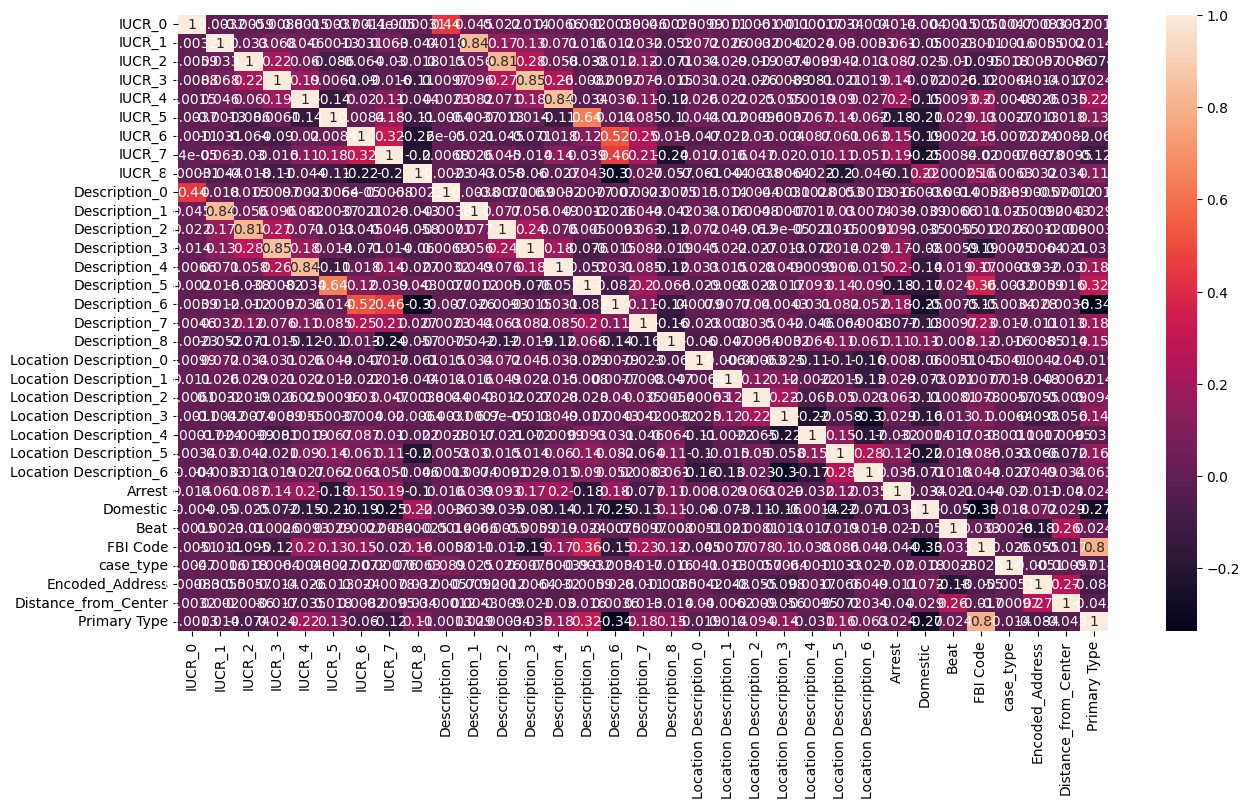

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data = df_encoded.corr(), annot = True)

In [ ]:
 df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203633 entries, 0 to 209998
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   IUCR_0                  203633 non-null  int64  
 1   IUCR_1                  203633 non-null  int64  
 2   IUCR_2                  203633 non-null  int64  
 3   IUCR_3                  203633 non-null  int64  
 4   IUCR_4                  203633 non-null  int64  
 5   IUCR_5                  203633 non-null  int64  
 6   IUCR_6                  203633 non-null  int64  
 7   IUCR_7                  203633 non-null  int64  
 8   IUCR_8                  203633 non-null  int64  
 9   Description_0           203633 non-null  int64  
 10  Description_1           203633 non-null  int64  
 11  Description_2           203633 non-null  int64  
 12  Description_3           203633 non-null  int64  
 13  Description_4           203633 non-null  int64  
 14  Description_5       

In [ ]:
x=df_encoded.iloc[:,:-1]
y=df_encoded.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(203633, 32)
(203633,)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(142543, 32)
(142543,)
(61090, 32)
(61090,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
m1=DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_m1=m1.predict(x_test)
print(y_pred_m1)

[ 0 22  1 ...  8 27  1]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,y_pred_m1)
print(cm1)
print(classification_report(y_test,y_pred_m1))

[[ 4099     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0 11506     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0  3336     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     9     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0   323     0     2     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0  7129     0     0     0     0     0     0
      0     0     0     0     0     0     0     0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4099
           1       1.00      1.00      1.00     11506
           2       1.00      1.00      1.00      3336
           3       1.00      1.00      1.00         9
           4       0.99      0.99      0.99       325
           5       1.00      1.00      1.00      7129
           6       0.33      0.33      0.33         3
           7       1.00      1.00      1.00      1469
           8       1.00      1.00      1.00      3748
           9       1.00      1.00      1.00        55
          10       1.00      1.00      1.00         1
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        49
          14       1.00      1.00      1.00      2529
          15       1.00      1.00      1.00      4365
          16       0.80      0.67      0.73         6
          17       0.62    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
m2=RandomForestClassifier()
m2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_m2=m2.predict(x_test)
print(y_pred_m2)

[ 0 22  1 ...  8 27  1]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm2=confusion_matrix(y_test,y_pred_m2)
print(cm2)
print(classification_report(y_test,y_pred_m2))

[[ 4099     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    1 11505     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0  3336     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     9     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0   325     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0  7126     0     0     2     0     0     0
      0     0     0     1     0     0     0     0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
m3 = KNeighborsClassifier()
m3.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_m3=m3.predict(x_test)
print(y_pred_m3)

[ 0 22  1 ...  8 27  0]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm3=confusion_matrix(y_test,y_pred_m3)
print(cm3)
print(classification_report(y_test,y_pred_m3))

[[ 3649   450     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  316 11187     0     0     0     0     0     0     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0  3183     0     0     0     0     0     0     0     0     0
      0     0     1     0     0     0     0     0     0     0     0     0
     28     0   124     0]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     8]
 [    0     0     0     0   221     0     0     3     0    10     0     0
      0     0     0    40     0     0     0     0    43     8     0     0
      0     0     0     0]
 [    0     0     0     0     0  7116     0     0     5     0     0     0
      0     0     0     0     0     0     0     0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
